In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import json
from math import sqrt
%matplotlib notebook

In [2]:
prefix = "../build/"
# prefix = "./timeSqExp/testNaive/"

df = pd.read_csv(prefix+"data.csv")
df.columns = ['x', 'y', 'z', 'x_std', 'y_std', 'z_std','time']
df["x+"] = df["x"] + df["x_std"]
df["y+"] = df["y"] + df["y_std"]
df["z+"] = df["z"] + df["z_std"]
df["x-"] = df["x"] - df["x_std"]
df["y-"] = df["y"] - df["y_std"]
df["z-"] = df["z"] - df["z_std"]

print(df)

           x         y         z     x_std     y_std     z_std   time  \
0   0.097602  0.169818 -0.055622  0.093175  0.078801  0.097493  33887   
1   0.085366  0.148536 -0.048653  0.298155  0.194836  0.325362  32635   
2   0.092267  0.160551 -0.052590  0.531349  0.338221  0.581604  36541   
3   0.099249  0.172708 -0.056573  0.700536  0.443579  0.767247  56166   
4   0.098480  0.171377 -0.056138  0.801504  0.506660  0.877995  36208   
..       ...       ...       ...       ...       ...       ...    ...   
95  0.098796  0.171844 -0.056303  0.865642  0.546774  0.948300  34433   
96  0.091974  0.159976 -0.052413  0.865632  0.546766  0.948316  35919   
97  0.092326  0.160595 -0.052613  0.865631  0.546764  0.948322  36062   
98  0.097545  0.169682 -0.055586  0.865637  0.546790  0.948328  34505   
99  0.092816  0.161462 -0.052890  0.865639  0.546793  0.948331  35345   

          x+        y+        z+        x-        y-        z-  
0   0.190777  0.248619  0.041871  0.004428  0.091017 -0.15

In [3]:
path = pd.read_csv("path.csv")

print(path.tail())

df['gnd_x'] = path["x"] 
df['gnd_y'] = path["y"]
df['gnd_z'] = path["z"]

df.iloc[10]

      index         x         y         z
996     996 -0.263446 -0.067733  2.088647
997     997 -0.364201 -0.028504  2.140708
998     998 -0.454753  0.004004  2.182574
999     999 -0.537369  0.025985  2.214841
1000   1000 -0.615967  0.034738  2.237601


x            0.093370
y            0.162455
z           -0.053223
x_std        0.878228
y_std        0.554675
z_std        0.962326
time     57413.000000
x+           0.971598
y+           0.717130
z+           0.909103
x-          -0.784858
y-          -0.392220
z-          -1.015550
gnd_x        0.076027
gnd_y       -0.658572
gnd_z       -1.079498
Name: 10, dtype: float64

<IPython.core.display.Javascript object>


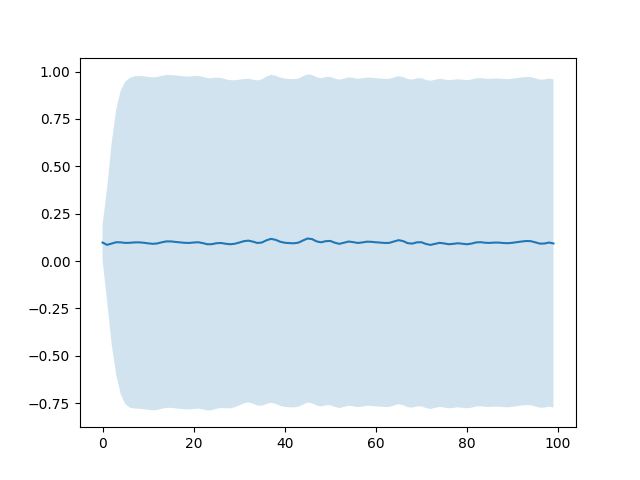

<IPython.core.display.Javascript object>


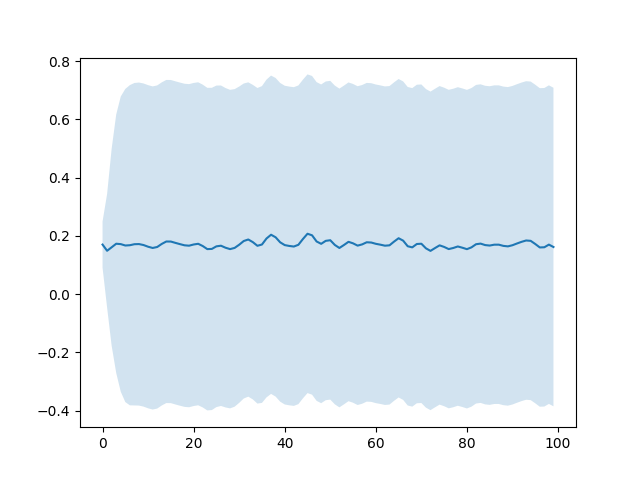

<IPython.core.display.Javascript object>


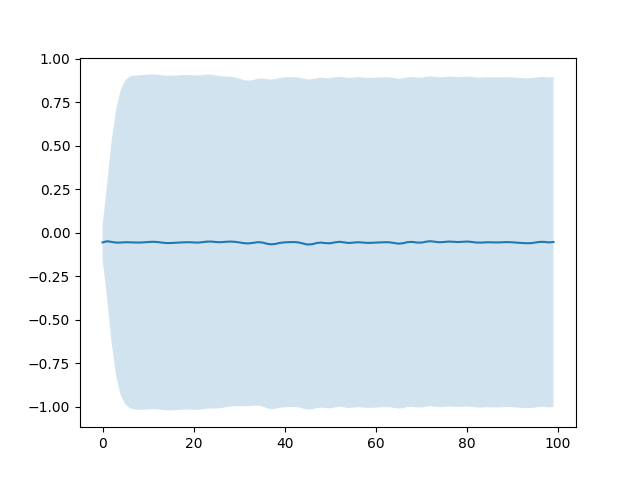

In [4]:
plt.plot(df.index, df['x'])
plt.fill_between(df.index, df['x+'], df['x-'], alpha=0.2)
# plt.plot(df.index, df['gnd_x'])

plt.figure()

plt.plot(df.index, df['y'])
plt.fill_between(df.index, df['y+'], df['y-'], alpha=0.2)
# plt.plot(df.index, df['gnd_y'])


plt.figure()
plt.plot(df.index, df['z'])
plt.fill_between(df.index, df['z+'], df['z-'], alpha=0.2)
# plt.plot(df.index, df['gnd_z'])

plt.show()


3.6873260656189184


<IPython.core.display.Javascript object>


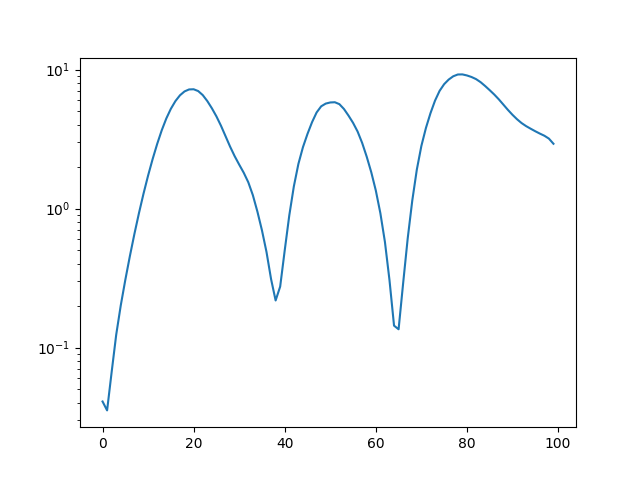

In [5]:
se = (df["x"]-df["gnd_x"])**2 + (df["y"]-df["gnd_y"])**2 + (df["z"]-df["gnd_z"])**2
mse = sum(se)/len(df['x'])
print(mse)
plt.figure()
plt.yscale("log")
plt.plot(df.index, se)
plt.show()

<IPython.core.display.Javascript object>


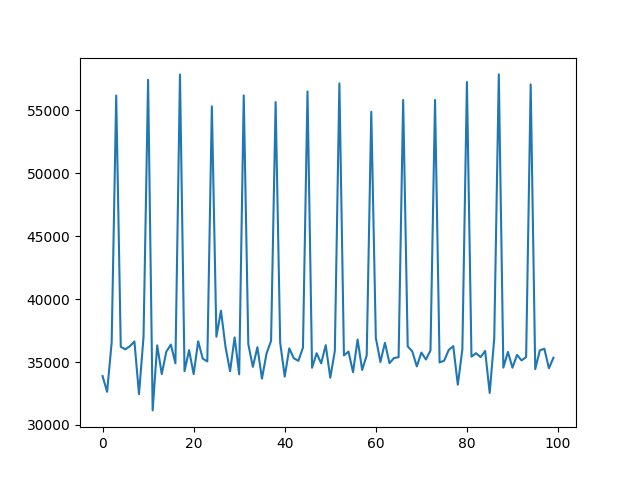

3.833639 s


In [6]:
plt.figure()
plt.plot(df.index, df['time'])
print(sum(df['time'])/10**6, "s")
plt.show()

In [7]:
# anchors = pd.read_csv(prefix+"anchors.csv")

with open("../data/anchors.json") as f:
    anchors = json.load(f)
    
x = [anchor["x"] for anchor in anchors]
y = [anchor["y"] for anchor in anchors]
z = [anchor["z"] for anchor in anchors]

anchors = list(zip(x,y,z))

print(anchors)

FileNotFoundError: [Errno 2] No such file or directory: '../data/anchors.json'

In [ ]:
# df_50 = df[:50]

ax = plt.figure().add_subplot(projection='3d')
# ax.scatter(x,y,z)
ax.plot(df_50['x'],df_50['y'],df_50['z'], c="orange")
# ax.plot(df_50['gnd_x'],df_50['gnd_y'],df_50['gnd_z'], c="green")



In [ ]:
print(sum(df['time'])/10**6, "s")
print(se[len(se)-1])

In [ ]:


dx = [sqrt((anchors[0][0] - df["gnd_x"][i])**2+(anchors[0][1] - df["gnd_y"][i])**2+(anchors[0][2] - df["gnd_z"][i])**2) for i in range (30)]
print(dx)


200 step fully connected
8953 ms
0.018081515014227126

200 step fully connected
21 ms
0.018128581248011585
